<a href="https://colab.research.google.com/github/maron2ee/Machine-Learning/blob/main/ml01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신 러닝의 일반적인 과정

* 문제 정의/파악, 큰 그림 파악
* 데이터 수집
* 데이터 탐색 - 시각화
* 데이터 전처리 - NA처리, 이상치 처리, 파생 변수 생성, 특성 제외, 숫자형/카테고리형 데이터 변환, ...
* 머신러닝 알고리즘 선택, 훈련(학습)
* 알고리즘 세부 튜닝 - 하이퍼 파라미터(hyper-parameter) 조정
* 알고리즘 성능 측정
* 상용화


In [1]:
# 필요한 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 코드 셀 실행: Ctrl + Enter
# 코드 셀 실행 후 다음 코드 셀로 커서 이동: Shift + Enter (jupyter notebook 기능)

In [2]:
# github에 저장된 csv(comma-separated values) 파일 위치
file_path = 'https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.csv'

In [3]:
# github의 파일을 읽어서 DataFrame을 생성
housing_df = pd.read_csv(file_path)

In [4]:
# DataFrame의 첫 5개 데이터를 출력
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
housing_df.info()
# 데이터 프레임의 정보 : 샘플(row) 개수, 변수/특성(column) 이름/개수/데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing_df.describe()
# 숫자형 변수(특성, 컬럼)등의 기술 통계 요약값

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing_df['ocean_proximity'].value_counts()
# 문자형/카테고리형 데이터의 요약: 카테고리별 데이터 개수

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

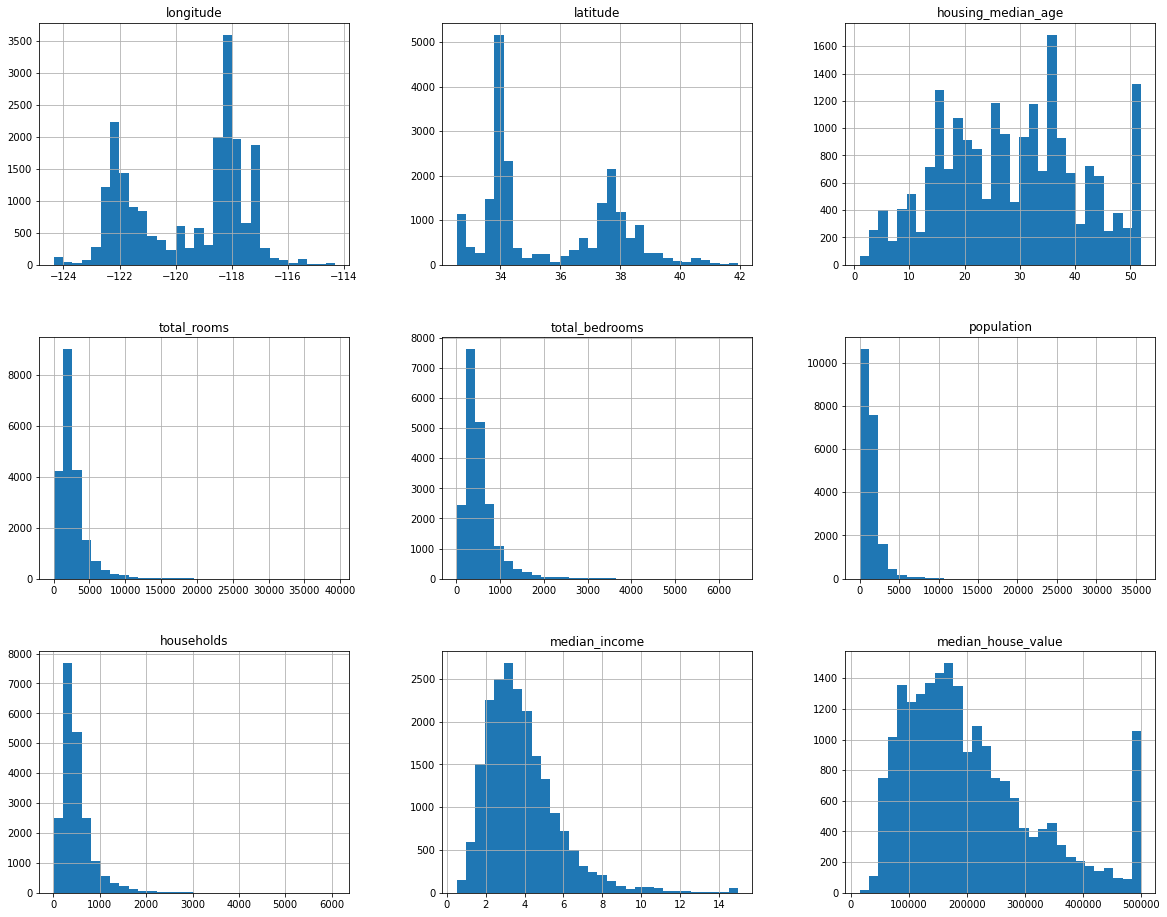

In [12]:
# 숫자형 데이터들의 분포 - 히스토그램(histogram)
housing_df.hist(figsize=(20,16), bins=30)
plt.show()

In [13]:
# 전체 데이터 셋을 훈련 셋과 테스트 셋으로 나눔.
# sklearn 패키지의 model_selection 모듈에서 train_test_split 함수를 임포트
from sklearn.model_selection import train_test_split

In [15]:
train, test = train_test_split(housing_df,                # 훈련/테스트로 나눌 데이터 셋
                               test_size=0.2,             # 테스트 셋의 비율
                               random_state=1)            # 난수 발생 seed

In [16]:
len(train)          # 20640*0.8

16512

In [17]:
len(test)           # 20640*0.2

4128

In [20]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,NEAR BAY
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,NEAR BAY
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,INLAND
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,<1H OCEAN
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,<1H OCEAN


In [21]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN


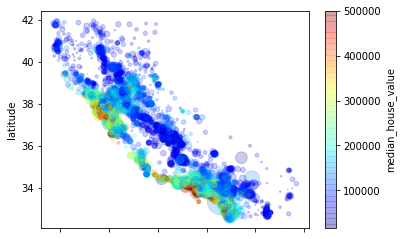

In [23]:
# 훈련 셋의 longitude, latitude 시각화
train.plot(x='longitude', y='latitude',     # x축, y축 변수 설정
           kind='scatter',                  # 그래프 종류 - 산점도
           alpha=0.2,                       # 불투명도(opacity), 투명도(transparency) : 0.0(투명) ~ 1.0(불투명)                  
           s=train['population']/50,        # 점의 크기(size)
           c='median_house_value',          # 점의 색깔(color)
           cmap='jet'                       # color map
           )    
plt.show()                   

In [24]:
# 변수들 간의 상관 관계(correlation) : 피어슨 상관계수(-1 ~ 1)
corr_mat = train.corr()
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925246,-0.106156,0.037578,0.065412,0.095861,0.049854,-0.018227,-0.050893
latitude,-0.925246,1.000000,0.009373,-0.029916,-0.063107,-0.105325,-0.066939,-0.076734,-0.139374
housing_median_age,-0.106156,0.009373,1.000000,-0.361784,-0.319623,-0.296996,-0.301496,-0.123550,0.105758
total_rooms,0.037578,-0.029916,-0.361784,1.000000,0.929219,0.854458,0.916737,0.201318,0.135514
total_bedrooms,0.065412,-0.063107,-0.319623,0.929219,1.000000,0.875187,0.979268,-0.006820,0.050560
population,0.095861,-0.105325,-0.296996,0.854458,0.875187,1.000000,0.905040,0.007521,-0.023884
households,0.049854,-0.066939,-0.301496,0.916737,0.979268,0.905040,1.000000,0.013801,0.066801
median_income,-0.018227,-0.076734,-0.123550,0.201318,-0.006820,0.007521,0.013801,1.000000,0.688194
median_house_value,-0.050893,-0.139374,0.105758,0.135514,0.050560,-0.023884,0.066801,0.688194,1.000000


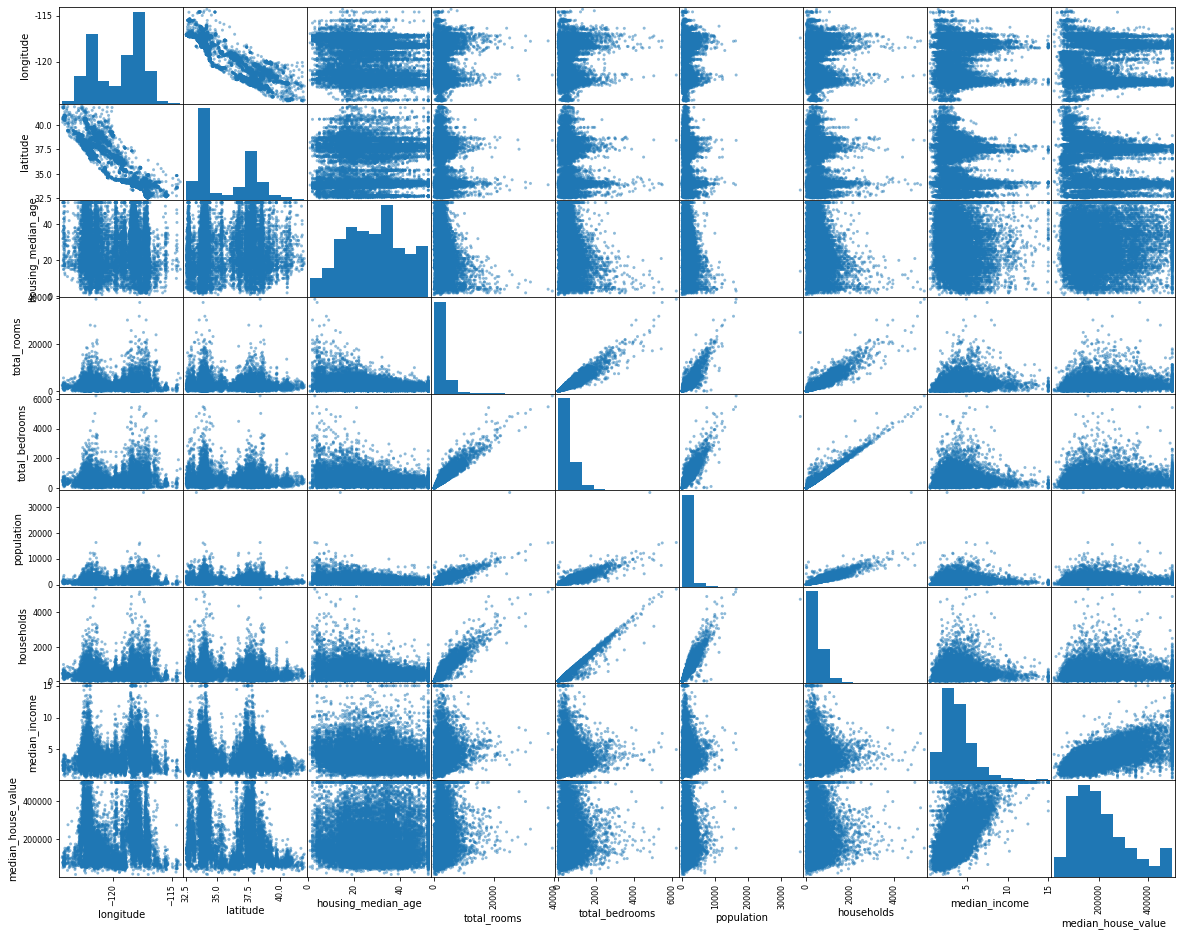

In [25]:
from pandas.plotting import scatter_matrix

scatter_matrix(train, figsize=(20, 16))
plt.show()